In [21]:
import numpy as np
from scipy.stats import norm
import ROOT
from scipy.stats import poisson
from array import array

In [22]:
mu_true = np.linspace(0, 20, 20001)
len(mu_true)
bkg = 3 #b

In [23]:
def Possion(n,mu):
    mu = mu + bkg
    p = poisson.pmf(n, mu)
    return p

In [24]:
def EndPoint(arr):
    cumulative_sum = 0
    cumulative_sum_array = [0]
    result_array = []
    for i in range(len(arr)):
        cumulative_sum += arr[i]
        cumulative_sum_array.append(cumulative_sum)
        if ((cumulative_sum <= 0.9) or ((cumulative_sum > 0.9) and (cumulative_sum_array[i]<=0.9))):
            result_array.append(arr[i])
    return len(result_array)-1

In [25]:
Lower_limit = []
Upper_limit = []

In [26]:
np.arange(0,10)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
for mu in mu_true:
        #mu = 0.1
        n = np.arange(0,40)
        mu_best = np.maximum(0, n-bkg)
        R = Possion(n,mu)/Possion(n,mu_best)
        Prob = Possion(n,mu)
        #print("Probablity:", Prob)
        #print("R:",R)
        index = np.argsort(R)[::-1]
        #print("index:", index)
        Sort_Prob = Prob[index]
        #print("Sort_Prob:",Sort_Prob)
        End_point = EndPoint(Sort_Prob) #index
        #print(End_point)
        n_bound = n[index][:End_point+1]
        #print("n_bount", n_bound)
        upper_limit = np.max(n_bound)
        lower_limit = np.min(n_bound)
        Lower_limit.append(lower_limit)
        Upper_limit.append(upper_limit)

In [28]:
step_upper = np.where(np.diff((np.array(Upper_limit))) != 0)
step_lower = np.where(np.diff((np.array(Lower_limit))) != 0)


mu_lo = mu_true[step_lower]
mu_lo = array("d", mu_lo)

mu_up = mu_true[step_upper]
mu_up = array("d", mu_up)

bin_center1 = np.arange(0.5, 16.5, 1.0)
bin_center1 = array("d", bin_center1)

bin_center2 = np.arange(5.5, 31.5, 1.0)
bin_center2 = array("d", bin_center2)

hlower_limit = ROOT.TGraph(len(mu_lo), bin_center1, mu_lo)
hupper_limit = ROOT.TGraph(len(mu_up), bin_center2, mu_up)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: jpg file output.jpg has been created


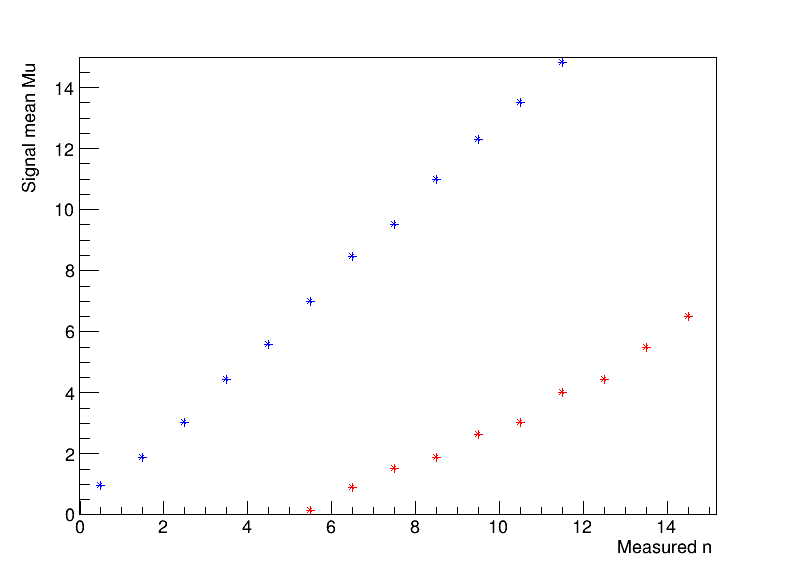

In [29]:
# Create TMultiGraph
TG = ROOT.TMultiGraph()
hupper_limit.SetMarkerStyle(3)  # 20 corresponds to a filled circle
hlower_limit.SetMarkerStyle(3)
hupper_limit.SetMarkerColor(2)
hlower_limit.SetMarkerColor(4)

TG.Add(hlower_limit, "AP")
TG.Add(hupper_limit, "AP")

# Create canvas
canvas = ROOT.TCanvas("canvas", "Confidence belt for Poisson distribution", 800, 600)

# Draw TMultiGraph
TG.Draw("A")

TG.GetXaxis().SetTitle("Measured n")
TG.GetYaxis().SetTitle("Signal mean Mu")

TG.GetXaxis().SetRangeUser(0, 15)
TG.GetYaxis().SetRangeUser(0, 15)
# Show the canvas
canvas.Draw()
canvas.SaveAs("output.jpg")